In [1]:
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sd = pd.read_csv("../data/SD.csv")
qm7 = pd.read_csv("../data/qm7.csv")
lipo = pd.read_csv("../data/Lipophilicity.csv")

In [3]:
def canonicalize_smiles(s):
    mol = Chem.MolFromSmiles(s)
    return Chem.MolToSmiles(mol, canonical=True) if mol is not None else None

def count_atoms(smiles: str):
    mol = Chem.MolFromSmiles(smiles)
    return mol.GetNumHeavyAtoms() if mol is not None else None

In [4]:
sd = sd.rename(columns={"neut-smiles": "smiles"})

In [5]:
sd["smiles"] = sd["smiles"].apply(canonicalize_smiles)
lipo["smiles"] = lipo["smiles"].apply(canonicalize_smiles)
qm7["smiles"] = qm7["smiles"].apply(canonicalize_smiles)

[21:02:32] WARNING: not removing hydrogen atom without neighbors
[21:02:32] WARNING: not removing hydrogen atom without neighbors
[21:02:32] WARNING: not removing hydrogen atom without neighbors
[21:02:32] WARNING: not removing hydrogen atom without neighbors
[21:02:32] WARNING: not removing hydrogen atom without neighbors
[21:02:32] WARNING: not removing hydrogen atom without neighbors
[21:02:32] WARNING: not removing hydrogen atom without neighbors


In [6]:
sd["atom_count"] = sd["smiles"].apply(count_atoms)
qm7["atom_count"] = qm7["smiles"].apply(count_atoms)
lipo["atom_count"] = lipo["smiles"].apply(count_atoms)

[21:03:05] WARNING: not removing hydrogen atom without neighbors
[21:03:05] WARNING: not removing hydrogen atom without neighbors
[21:03:05] WARNING: not removing hydrogen atom without neighbors
[21:03:05] WARNING: not removing hydrogen atom without neighbors
[21:03:05] WARNING: not removing hydrogen atom without neighbors
[21:03:05] WARNING: not removing hydrogen atom without neighbors
[21:03:05] WARNING: not removing hydrogen atom without neighbors


Text(0.5, 1.0, 'Molecular Size Distribution of MF-PCBA and Lipophilicity datasets')

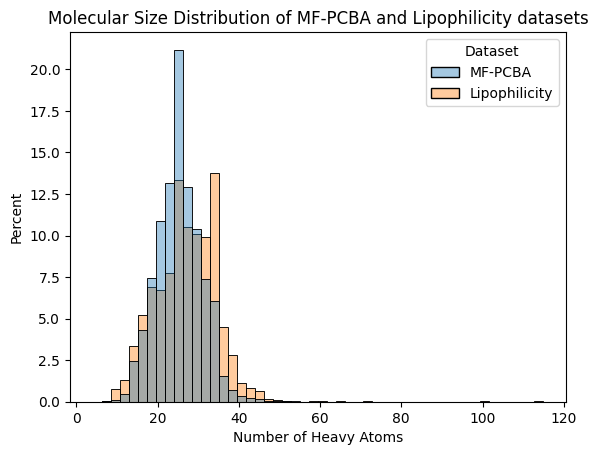

In [7]:
sd["Dataset"] = "MF-PCBA"
lipo["Dataset"] = "Lipophilicity"
combined = pd.concat([lipo, sd])

fig, ax = plt.subplots()
sns.histplot(combined, x="atom_count", fill=True, hue="Dataset", bins=50, common_norm=False, stat="percent", multiple="layer", legend=True, hue_order=["MF-PCBA", "Lipophilicity"], alpha=0.4)
ax.set_xlabel("Number of Heavy Atoms")
ax.set_title("Molecular Size Distribution of MF-PCBA and Lipophilicity datasets")

<Axes: xlabel='atom_count', ylabel='Percent'>

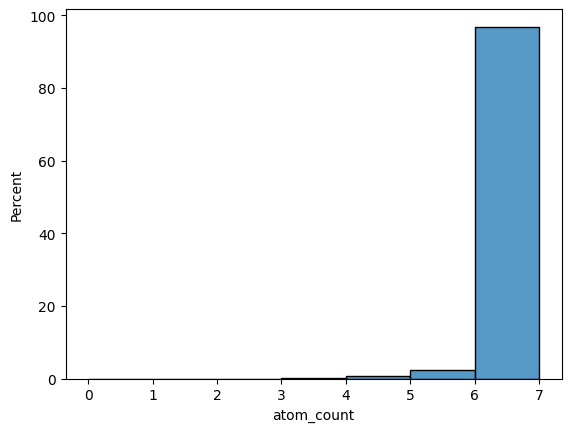

In [8]:
sns.histplot(qm7, x="atom_count", fill=True, bins=7, common_norm=False, stat="percent")